In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing dataset

import_df = pd.read_csv(r'D:\Prot\Data Analyst\UM selected projects\I_Electric Vehicles\Electric Vehicle Sales by State in India_Edited.csv')

In [3]:
# Creating copy of the original dataframe

ev_df = import_df.copy()

In [4]:
# Querying for 1st 5 rows

ev_df[:5]

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,January,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,January,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,January,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,January,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,January,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0


In [5]:
# Querying for missing values

ev_df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [6]:
# Summary of the dataset

ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [7]:
# Changing data type of date from object to datetime

ev_df['Date'] = pd.to_datetime(ev_df['Date'])

In [8]:
# Analysing total number of rows and columns

ev_df.shape

(96845, 8)

In [9]:
# Checking for duplicate values

ev_df[ev_df.duplicated()]

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity


* There are no duplicates.

In [11]:
# Statistical summary

ev_df.describe(include = "all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Year,96845.0,NaN,NaN,NaN,2018.622768,2014.0,2016.0,2019.0,2021.0,2024.0,2.895581
Month_Name,96845,12,January,8853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,96845,NaN,NaN,NaN,2018-08-21 18:58:21.900975872,2014-01-01 00:00:00,2016-01-08 00:00:00,2019-01-02 00:00:00,2021-01-09 00:00:00,2024-01-01 00:00:00,NaN
State,96845,34,Maharashtra,4912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Class,96845,73,MOTOR CAR,4111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Category,96845,5,Others,54423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Type,96845,12,Others,54423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EV_Sales_Quantity,96845.0,NaN,NaN,NaN,37.108896,0.0,0.0,0.0,0.0,20584.0,431.566675


In [12]:
# Calculating total sales per year

total_sales_years = ev_df.groupby('Year')[['EV_Sales_Quantity']].sum().reset_index()
total_sales_years

,Year,EV_Sales_Quantity
0,2014,2392
1,2015,7805
2,2016,49855
3,2017,87420
4,2018,130254
5,2019,166819
6,2020,124684
7,2021,331498
8,2022,1024723
9,2023,1525179


In [13]:
# Calculating minimum monthly sales

minimum_monthly_sales = ev_df.groupby(['Year','Month_Name'])[['EV_Sales_Quantity']].min().reset_index()
minimum_monthly_sales

,Year,Month_Name,EV_Sales_Quantity
0,2014,April,0
1,2014,August,0
2,2014,December,0
3,2014,February,0
4,2014,January,0
...,...,...,...
116,2023,May,0
117,2023,November,0
118,2023,October,0
119,2023,September,0


In [14]:
# Calculating maximum monthly sales

maximum_monthly_sales = ev_df.groupby(['Year','Month_Name'])[['EV_Sales_Quantity']].max().reset_index()
maximum_monthly_sales

,Year,Month_Name,EV_Sales_Quantity
0,2014,April,104
1,2014,August,50
2,2014,December,83
3,2014,February,76
4,2014,January,78
...,...,...,...
116,2023,May,19908
117,2023,November,18422
118,2023,October,17675
119,2023,September,19486


In [15]:
# Calculating average monthly sales

average_monthly_sales = ev_df.groupby(['Year','Month_Name'])[['EV_Sales_Quantity']].mean().reset_index()
average_monthly_sales

,Year,Month_Name,EV_Sales_Quantity
0,2014,April,0.335553
1,2014,August,0.239680
2,2014,December,0.318121
3,2014,February,0.226490
4,2014,January,0.304862
...,...,...,...
116,2023,May,183.021991
117,2023,November,175.212400
118,2023,October,161.709640
119,2023,September,148.769499


In [16]:
# Looking for records by state and year

state_name = input('Enter state name : ')
sales_year = int(input('Enter year : '))

record_state_year = ev_df.loc[(ev_df['Year'] == sales_year) & (ev_df['State'] == state_name)]
record_state_year

Enter state name :  Odisha
Enter year :  2015


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
1225,2015,January,2015-01-01,Odisha,ADAPTED VEHICLE,Others,Others,0
1226,2015,January,2015-01-01,Odisha,AGRICULTURAL TRACTOR,Others,Others,0
1227,2015,January,2015-01-01,Odisha,AMBULANCE,Others,Others,0
1228,2015,January,2015-01-01,Odisha,ARTICULATED VEHICLE,Others,Others,0
1229,2015,January,2015-01-01,Odisha,BUS,Bus,Bus,0
...,...,...,...,...,...,...,...,...
90012,2015,December,2015-01-12,Odisha,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0
90013,2015,December,2015-01-12,Odisha,TRACTOR (COMMERCIAL),Others,Others,0
90014,2015,December,2015-01-12,Odisha,TRACTOR-TROLLEY(COMMERCIAL),Others,Others,0
90015,2015,December,2015-01-12,Odisha,TRAILER (AGRICULTURAL),Others,Others,0


In [17]:
# Calculating total EV sales by state

total_sales_state = ev_df.groupby('State').agg(Total_Sales = ('EV_Sales_Quantity','sum'))\
                        .sort_values(by = 'Total_Sales', ascending = False)\
                        .reset_index()
total_sales_state

,State,Total_Sales
0,Uttar Pradesh,732074
1,Maharashtra,401535
2,Karnataka,315498
3,Delhi,268538
4,Rajasthan,228573
5,Bihar,213465
6,Tamil Nadu,206902
7,Gujarat,176713
8,Assam,151917
9,Kerala,133246


* Uttar Pradesh tops in total sales of EV's which is around 732074 followed by Maharashtra 401535 and Karnataka 315498.

In [19]:
# Calculating average EV sales by state

avg_sales_state = ev_df.groupby('State').agg(Average_Sales = ('EV_Sales_Quantity','mean'))\
                                        .sort_values(by = 'Average_Sales',ascending = False)\
                                        .reset_index()
avg_sales_state.round(2)

,State,Average_Sales
0,Uttar Pradesh,160.65
1,Delhi,143.53
2,Bihar,83.91
3,Maharashtra,81.75
4,Karnataka,65.32
5,Tamil Nadu,50.92
6,Rajasthan,50.21
7,Assam,48.79
8,Gujarat,39.12
9,Madhya Pradesh,37.13


* Uttar Pradesh tops in average sales of EV's which is around 160.65 followed by Delhi 143.53 and Bihar 83.91.

In [21]:
# Calculating top 5 months with highest sales

top_months = ev_df.groupby('Month_Name').agg(Total_Sales = ('EV_Sales_Quantity','sum')).sort_values(by = 'Total_Sales',ascending = False)[:5]
top_months

,Total_Sales
Month_Name,
November,382217
December,364558
January,360703
October,355083
September,313433


* November has the highest sales over the years which is around 382217 followed by December 364558 and January 360703.
* It is likely that people are buying EV's during winters.

In [23]:
# Calculating total sales of vehicle type

total_sales_vehicle_type = ev_df.groupby('Vehicle_Type').agg(Total_sales = ('EV_Sales_Quantity','sum'))\
                                                        .sort_values(by = 'Total_sales' ,ascending = False).reset_index()
total_sales_vehicle_type

,Vehicle_Type,Total_sales
0,2W_Personal,1796340
1,3W_Shared_LowSpeed,1408127
2,4W_Personal,130676
3,3W_Goods_LowSpeed,90656
4,3W_Shared,76132
5,3W_Goods,44974
6,4W_Shared,19099
7,2W_Shared,11765
8,Others,8612
9,Bus,7009


* 2 wheeler personal has highest total sales of 1796340 followed by 3 wheeler shared low speed 1408127 and 4 wheeler personal 130676.

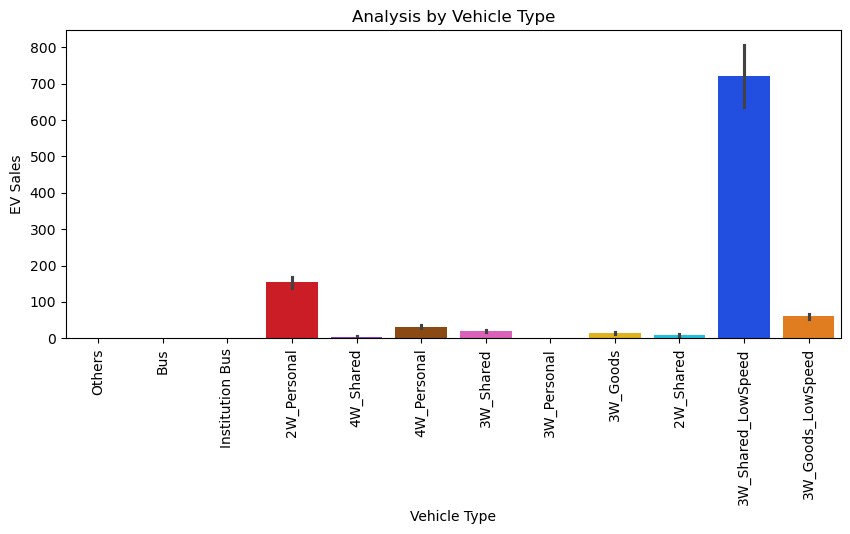

In [25]:
# Plotting vehicle type and ev sales

plt.figure(figsize=(10,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=ev_df,hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

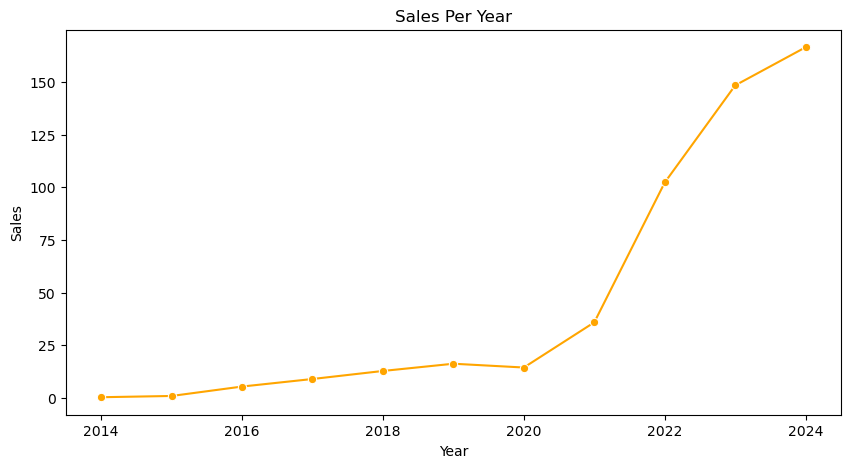

In [26]:
# Plotting yearly sales trend

plt.figure(figsize = (10,5))
sns.lineplot(x = 'Year', y = 'EV_Sales_Quantity',marker = 'o', data = ev_df,color = 'orange',errorbar=None)
plt.title('Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [27]:
# Querying for month names

month_order = ev_df['Month_Name'].unique()


# Converting Month_Name to ordered categorical

ev_df['Month_Name'] = pd.Categorical(ev_df['Month_Name'],categories = month_order,ordered = True)


# Querying for state wise monthly sales

monthly_sales = ev_df.groupby(['State','Month_Name'],observed=True).agg(Monthly_sales = ('EV_Sales_Quantity','sum')).reset_index()
state_name = input('Enter state name : ')
month_record = monthly_sales.loc[monthly_sales['State'] == state_name]
month_record

Enter state name :  Odisha


,State,Month_Name,Monthly_sales
288,Odisha,January,9203
289,Odisha,February,4738
290,Odisha,March,6968
291,Odisha,April,6113
292,Odisha,May,6397
293,Odisha,June,5000
294,Odisha,July,6009
295,Odisha,August,6313
296,Odisha,September,6924
297,Odisha,October,10125


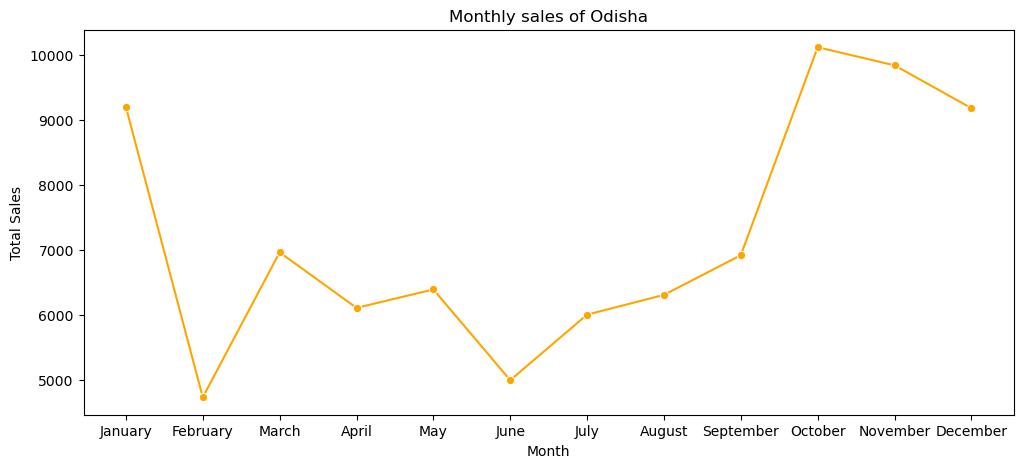

In [28]:
# Plotting the above

plt.figure(figsize = (12,5))
sns.lineplot(x = 'Month_Name', y = 'Monthly_sales',data = month_record,color = 'orange',marker = 'o')
plt.title(f'Monthly sales of {state_name}')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [29]:
# Creating pivot table for vehicle type vs year with total sales per year

Vehicle_Type_pivot = pd.pivot_table(ev_df,index = 'Vehicle_Type', columns = 'Year', values = 'EV_Sales_Quantity',aggfunc='sum')
Vehicle_Type_pivot

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Vehicle_Type,,,,,,,,,,,
2W_Personal,1679,1447,1460,1525,16795,28912,27015,154380,626993,854831,81303
2W_Shared,0,0,0,3,264,1445,2095,1816,4097,2005,40
3W_Goods,3,7,27,114,169,423,372,4545,12697,24693,1924
3W_Goods_LowSpeed,0,10,158,1175,2737,4982,6074,14623,21909,35253,3735
3W_Personal,2,0,5,13,48,29,50,36,107,110,21
3W_Shared,7,307,1295,518,656,882,1522,3521,11948,48626,6850
3W_Shared_LowSpeed,0,5116,45867,81710,106841,127852,83218,137184,306081,473866,40392
4W_Personal,482,677,615,827,1023,962,3215,12253,33173,70868,6581
4W_Shared,16,84,77,281,565,704,986,749,4997,9253,1387


In [30]:
# Creating pivot table for state vs year with total sales per year

state_pivot = pd.pivot_table(ev_df, index = 'State',columns = 'Year', values = 'EV_Sales_Quantity', aggfunc = 'sum')
state_pivot

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
State,,,,,,,,,,,
Andaman & Nicobar Island,0,0,0,0,20,2,36,92,23,26,3
Andhra Pradesh,12,8,20,0,1165,2123,1623,9540,29006,31506,2353
Arunachal Pradesh,0,0,1,0,1,1,5,2,2,21,7
Assam,2,23,19,3833,7403,10867,8357,15633,40720,60798,4262
Bihar,12,69,1100,3593,8469,12380,12447,23082,55752,88186,8375
Chandigarh,0,2,1,23,213,506,369,734,2719,6333,553
Chhattisgarh,123,86,192,945,1902,2744,1489,4214,22363,37638,3579
DNH and DD,0,2,2,1,19,19,24,29,140,160,35
Delhi,48,3565,21688,18042,20961,23222,12378,25815,62265,73487,7067


In [31]:
# Top 3 states with highest sales

states_sales = ev_df.groupby(['Year','State']).agg(Total_Sales = ('EV_Sales_Quantity','sum'))

states_sales['Rank'] = states_sales.groupby('Year')['Total_Sales'].rank(method = 'dense',ascending = False).astype(int)

top_3_states = states_sales[states_sales['Rank'] <= 3].sort_values(by = ['Year','Rank'])

top_3_states

Total_Sales  Rank
Year State                           
2014 Maharashtra            905     1
     Karnataka              601     2
     Tamil Nadu             196     3
2015 Delhi                 3565     1
     Maharashtra           1015     2
     Uttar Pradesh         1012     3
2016 Delhi                21688     1
     Uttar Pradesh        15310     2
     Rajasthan             3996     3
2017 Uttar Pradesh        40649     1
     Delhi                18042     2
     West Bengal           4455     3
2018 Uttar Pradesh        53212     1
     Delhi                20961     2
     Bihar                 8469     3
2019 Uttar Pradesh        55796     1
     Delhi                23222     2
     West Bengal          13533     3
2020 Uttar Pradesh        31264     1
     Bihar                12447     2
     Delhi                12378     3
2021 Uttar Pradesh        66702     1
     Karnataka            33314     2
     Tamil Nadu           30030     3
2022 Uttar Pradesh       162857     1
     Maharashtra         136036     2
     Karnataka            95934     3
2023 Uttar Pradesh       277300     1
     Maharashtra         193935     2
     Karnataka           151272     3
2024 Uttar Pradesh        27833     1
     Maharashtra          18745     2
     Karnataka            14191     3

In [32]:
# Ranking vehicle_Type by total sales

vehicle = ev_df.groupby('Vehicle_Type').agg(Total_Sales = ('EV_Sales_Quantity','sum'))

vehicle['Rank'] = vehicle['Total_Sales'].rank(method = 'dense', ascending = False).astype(int)

top_vehicle_type = vehicle.sort_values(by = 'Rank')

top_vehicle_type

,Total_Sales,Rank
Vehicle_Type,,
2W_Personal,1796340,1
3W_Shared_LowSpeed,1408127,2
4W_Personal,130676,3
3W_Goods_LowSpeed,90656,4
3W_Shared,76132,5
3W_Goods,44974,6
4W_Shared,19099,7
2W_Shared,11765,8
Others,8612,9


In [33]:
# Calculating YoY (Year-over-Year) growth rate

YoY_growth = ev_df.groupby('Year').agg(Total_Sales = ('EV_Sales_Quantity','sum'))
YoY_growth['YoY_Growth_prcent'] = YoY_growth['Total_Sales'].pct_change()*100
YoY_growth.round(2)

,Total_Sales,YoY_Growth_prcent
Year,,
2014,2392,NaN
2015,7805,226.30
2016,49855,538.76
2017,87420,75.35
2018,130254,49.00
2019,166819,28.07
2020,124684,-25.26
2021,331498,165.87
2022,1024723,209.12


* YoY growth has risen from 2014 to 2016 around 538%.
* Then it dipped from 2017 to 2020 to -25.26%.
* Again it has been increased from 2021 to 2022 to 209.12%.
* Then again dipped to -90.61% in 2024.

In [36]:
# Calculating CAGR

def calculate_cagr(start_value, end_value, periods):
    cagr = ((end_value / start_value) ** (1 / periods)) - 1
    return round(cagr * 100, 2)

# Creating Values

start_value = total_sales_years['EV_Sales_Quantity'].iloc[0]
end_value = total_sales_years['EV_Sales_Quantity'].iloc[-1]
periods = total_sales_years['Year'].iloc[-1] - total_sales_years['Year'].iloc[0]

cagr = calculate_cagr(start_value,end_value,periods)
    
print(f'CAGR over {periods} years : {cagr}% ')

CAGR over 10 years : 50.56% 


* The annual CAGR for last 10 years is 50.56%.

### Analysis

* There are some years where monthly sales are 0.
* Uttar Pradesh tops in EV sales followed by Maharashtra and Karnataka in total sales over the years.
* Uttar Pradesh tops in EV sales followed by Delhi and Bihar in average sales over the years.
* Month of November is seen the highest total sales followed by December and January.
* It is likely that people are buying during winters.
* 2 wheeler personal vehicle type has maximum sales followed by 3 wheeler shared low speed and 4 wheeler personal.
* Yearly sales of EV's has risen from 2014 to 2024.
* YoY growth has risen from 2014 to 2016 then it dipped from 2017 to 2020 then again risen from 2021 to 2022 then again dipped in 2023 and 2024.
* The annual CAGR for last 10 years is 50.56%.